In [0]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
hd_input = pd.read_csv("data/hair_dryer.tsv", sep='\t');
hd_input.head()

marketplace  ...  review_date
0          US  ...    8/31/2015
1          US  ...    8/31/2015
2          US  ...    8/31/2015
3          US  ...    8/31/2015
4          US  ...    8/31/2015

[5 rows x 15 columns]

In [0]:
hd_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11470 entries, 0 to 11469
Data columns (total 15 columns):
marketplace          11470 non-null object
customer_id          11470 non-null int64
review_id            11470 non-null object
product_id           11470 non-null object
product_parent       11470 non-null int64
product_title        11470 non-null object
product_category     11470 non-null object
star_rating          11470 non-null int64
helpful_votes        11470 non-null int64
total_votes          11470 non-null int64
vine                 11470 non-null object
verified_purchase    11470 non-null object
review_headline      11468 non-null object
review_body          11470 non-null object
review_date          11470 non-null object
dtypes: int64(5), object(10)
memory usage: 1.3+ MB


In [0]:
hd_input = hd_input[['star_rating', 'helpful_votes', 'total_votes', 'vine', 'verified_purchase', 'review_headline', 'review_body']]
hd_input.head(5)

star_rating  ...                                        review_body
0            5  ...                                       Works great!
1            4  ...  This dries my hair faster that bigger, more po...
2            5  ...                                   Love this dryer!
3            5  ...                              styling hair in style
4            4  ...  I just got this last week. I think's great. Th...

[5 rows x 7 columns]

In [0]:
# fill NA values by space
hd_input['review_body'] = hd_input['review_body'].fillna('')

# CountVectorizer() converts a collection 
# of text documents to a matrix of token counts
vectorizer = CountVectorizer()
# assign a shorter name for the analyze
# which tokenizes the string
analyzer = vectorizer.build_analyzer()

def wordcounts(s):
    c = {}
    # tokenize the string and continue, if it is not empty
    if analyzer(s):
        d = {}
        # find counts of the vocabularies and transform to array 
        w = vectorizer.fit_transform([s]).toarray()
        # vocabulary and index (index of w)
        vc = vectorizer.vocabulary_
        # items() transforms the dictionary's (word, index) tuple pairs
        for k,v in vc.items():
            d[v]=k # d -> index:word 
        for index,i in enumerate(w[0]):
            c[d[index]] = i # c -> word:count
    return  c

# add new column to the dataframe
hd_input['Word Counts'] = hd_input['review_body'].apply(wordcounts)
hd_input.head()

star_rating  ...                                        Word Counts
0            5  ...                           {'great': 1, 'works': 1}
1            4  ...  {'1600': 1, 'amount': 1, 'and': 5, 'anticipate...
2            5  ...                 {'dryer': 1, 'love': 1, 'this': 1}
3            5  ...     {'hair': 1, 'in': 1, 'style': 1, 'styling': 1}
4            4  ...  {'cord': 1, 'got': 1, 'great': 1, 'is': 1, 'ju...

[5 rows x 8 columns]

Selected Words
great    3312
love     2291
happy     596
super     349
bad       255
dtype: int64


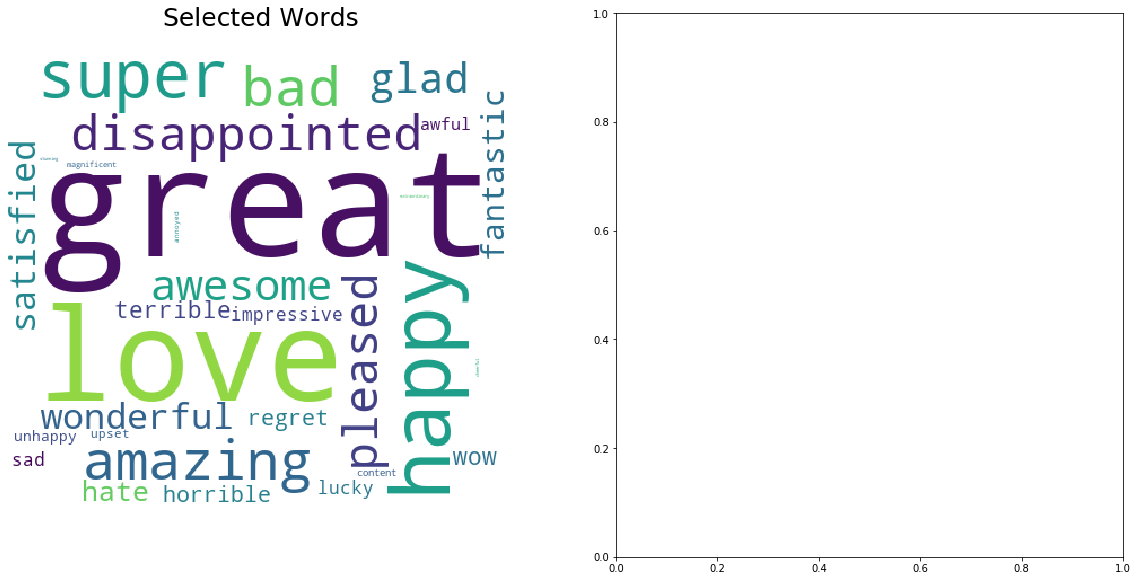

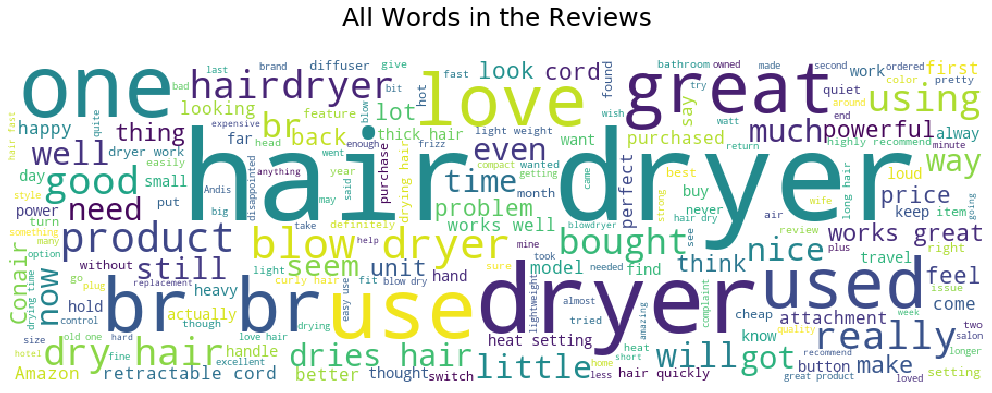

In [0]:
# selecting some words to examine detailed 
selectedwords = ['awesome','great','fantastic','extraordinary','amazing','super',
                 'magnificent','stunning','impressive','wonderful','breathtaking',
                 'love','content','pleased','happy','glad','satisfied','lucky',
                 'shocking','cheerful','wow','sad','unhappy','horrible','regret',
                 'bad','terrible','annoyed','disappointed','upset','awful','hate']

def selectedcount(dic,word):
    if word in dic:
        return dic[word]
    else:
        return 0
    
hdwc = hd_input.copy()  
for word in selectedwords:
    hdwc[word] = hdwc['Word Counts'].apply(selectedcount,args=(word,))
    
word_sum = hdwc[selectedwords].sum()
print('Selected Words')
print(word_sum.sort_values(ascending=False).iloc[:5])

fig, ax = plt.subplots(1,2,figsize=(20,10))
wc0 = WordCloud(background_color='white', width=450, height=400 ).generate_from_frequencies(word_sum)

ax[0].imshow(wc0)
ax[0].set_title('Selected Words\n',size=25)
ax[0].axis('off')

rt = hd_input['review_body']
plt.subplots(figsize=(18,6))
wordcloud = WordCloud(background_color='white',
                      width=900,
                      height=300
                     ).generate(" ".join(rt))
plt.imshow(wordcloud)
plt.title('All Words in the Reviews\n',size=25)
plt.axis('off')
plt.show()

In [0]:
hd_input = hd_input[hd_input['star_rating'] != 3]
hd_input['Sentiment'] = hd_input['star_rating'] >=4
hd_input.head()

star_rating  ...  Sentiment
0            5  ...       True
1            4  ...       True
2            5  ...       True
3            5  ...       True
4            4  ...       True

[5 rows x 9 columns]

In [0]:
hd_input = hd_input.dropna()

In [0]:
train_data,test_data = train_test_split(hd_input,train_size=0.8,random_state=0)
X_train = vectorizer.fit_transform(train_data['review_body'])
y_train = train_data['helpful_votes']
X_test = vectorizer.transform(test_data['review_body'])
y_test = test_data['helpful_votes']

In [0]:
start=dt.datetime.now()
nn = MLPClassifier()
nn.fit(X_train,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))

Elapsed time:  0:03:28.262695


In [10]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [0]:
from textblob import TextBlob

text = '''
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
'''

In [0]:
blob = TextBlob(text)

In [12]:
for sentence in blob.sentences:
    print(sentence.sentiment.polarity)

0.06000000000000001
-0.34166666666666673


In [15]:
pos = TextBlob("i love this!!!!")
print(pos.sentiment.polarity)

1.0


In [17]:
neg = TextBlob("it's really bad.")
print(neg.sentiment.polarity)

-0.6999999999999998


In [18]:
neu = TextBlob("I like this, but my wife say it's not useful.")
print(neu.sentiment.polarity)

-0.15
